In [5]:
import pickle
import tcav.utils_plot as utils_plot 
import pandas as pd
import numpy as np
import os

print(os.getcwd())

/zhome/94/5/127021/speciale/tcav


In [2]:
name = 'results_pickle/results_zebra_50010.pkl'
# 'results_pickle/results_zebra_50010.pkl' 
# 'results_pickle/results_zebra_505.pkl'
# 'results_pickle/result_random500_100_to_102.pkl'

with open(name, 'rb') as f:
    data = pickle.load(f)

>>> Number of TCAV concept observations <<<
 500
>>> Number of TCAV random observations <<<
 4990


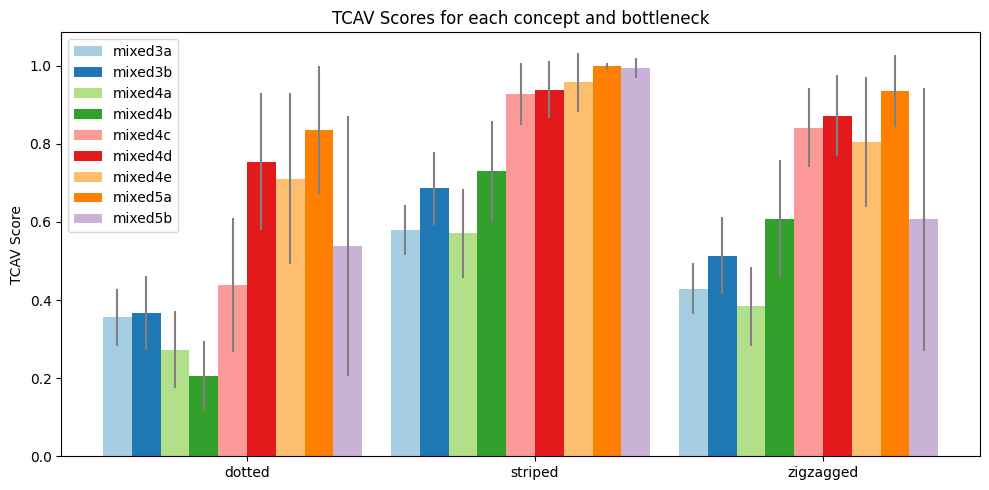

In [3]:
t_test_mean = 0.5 # None # if value given this will be a 1 sample t-test
bonferroni_nr = 2 #7
alternative = 'two-sided' # 'less' # 'greater' 
distribution_info = utils_plot.plot_results(data, num_random_exp=10, plot_hist = False,min_p_val=0.05, bonferroni_nr = bonferroni_nr,
alternative = alternative, t_test_mean = t_test_mean , save_fig = False)

In [75]:
# create 4 df with correct column names
layers = ['mixed3a', 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c', 'mixed4d','mixed4e', 'mixed5a', 'mixed5b']
idx = ['mean','std','p-value']

df_dot = pd.DataFrame(index = layers, columns = [np.array(['dotted']*3),np.array(idx)], dtype = 'float')
df_str = pd.DataFrame(index = layers, columns = [np.array(['striped']*3),np.array(idx)], dtype = 'float')
df_zig = pd.DataFrame(index = layers, columns = [np.array(['zigzagged']*3),np.array(idx)], dtype = 'float')
df_ran = pd.DataFrame(index = layers, columns = [np.array(['random']*3),np.array(idx)], dtype = 'float')

In [78]:

val_list = ['bn_vals','bn_stds','p-value']#,'significant']
for layer in layers:
    for v, value in enumerate(val_list):
        for i in range(3):
            if i == 0:
                df_dot.loc[layer,'dotted'][v] = distribution_info[layer][value][i]
            elif i == 1:
                distribution_info[layer][value][i]
                df_str.loc[layer,'striped'][v] = distribution_info[layer][value][i]
            else:
                distribution_info[layer][value][i]
                df_zig.loc[layer,'zigzagged'][v] = distribution_info[layer][value][i]

In [85]:
for layer in layers:
    for i, val in enumerate(idx):
        df_ran.loc[layer,'random'][val] = distribution_info[layer]['random_p-value'][i]

In [102]:
with open(f'SavedResults/imagenet_tcav_results/concept_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:0.5f}".format,label = 'app_tab:imagenet stat num concept'))

with open(f'SavedResults/imagenet_tcav_results/random_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:0.5f}".format, label = 'app_tab:imagenet stat num random'))


/tmp/ipykernel_7141/2109955219.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:0.5f}".format,label = 'app_tab:imagenet stat num concept'))
/tmp/ipykernel_7141/2109955219.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:0.5f}".format, label = 'app_tab:imagenet stat num random'))
